# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-4.22.4-cp310-abi3-win_amd64.whl (420 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.54.0-cp310-cp310-win_amd64.whl (4.1 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached jax-0.4.8-

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-26_h3tjg\tensorflow-gpu_b3fc78b1f4394dc8973ebef65fafa5d5\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [3]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [4]:
import tensorflow as tf
import os

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\Celana\archive.zip
Image not in ext list data\Celana\Image_148.jpg
Image not in ext list data\Celana\Image_174.gif
Image not in ext list data\Jaket\Image_106.gif
Image not in ext list data\Jaket\Image_94.gif


# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 674 files belonging to 3 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

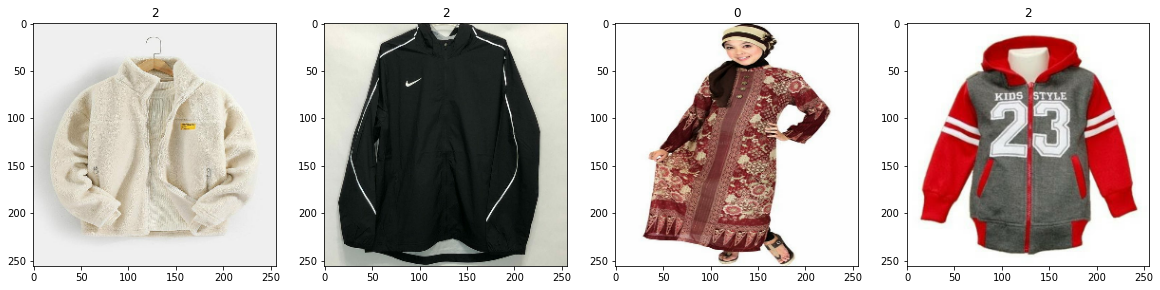

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.6696078 , 0.66568625, 0.68921566],
          [0.65134805, 0.6474265 , 0.6709559 ],
          [0.652451  , 0.6485294 , 0.6720588 ],
          ...,
          [0.54473037, 0.5672181 , 0.57034314],
          [0.5561274 , 0.5707108 , 0.5889093 ],
          [0.81764704, 0.8315564 , 0.84345704]],
 
         [[0.6406662 , 0.6367446 , 0.660274  ],
          [0.6231005 , 0.61917895, 0.64270836],
          [0.62420344, 0.6202819 , 0.6438113 ],
          ...,
          [0.5264093 , 0.54313725, 0.55490196],
          [0.5273294 , 0.54191273, 0.5601112 ],
          [0.7893995 , 0.80330884, 0.8186275 ]],
 
         [[0.6406863 , 0.6367647 , 0.6602941 ],
          [0.62242645, 0.6185049 , 0.6420343 ],
          [0.62352943, 0.61960787, 0.6431373 ],
          ...,
          [0.53357846, 0.5492647 , 0.56102943],
          [0.53112745, 0.5457108 , 0.5639093 ],
          [0.7905024 , 0.80441177, 0.8197304 ]],
 
         ...,
 
         [[0.69763803, 0.69371647, 0.7172459 ],
          [0.67865

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

15

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 11s 626ms/step - loss: -3.4099 - accuracy: 0.3208 - val_loss: -52.5639 - val_accuracy: 0.3047
Epoch 2/20
15/15 [==============================] - 9s 558ms/step - loss: -308.3219 - accuracy: 0.3167 - val_loss: -1121.4022 - val_accuracy: 0.2812
Epoch 3/20
15/15 [==============================] - 9s 570ms/step - loss: -1736.4738 - accuracy: 0.3271 - val_loss: -4367.4561 - val_accuracy: 0.3125
Epoch 4/20
15/15 [==============================] - 9s 563ms/step - loss: -16149.7324 - accuracy: 0.3063 - val_loss: -49252.8359 - val_accuracy: 0.2656
Epoch 5/20
15/15 [==============================] - 9s 565ms/step - loss: -87973.8359 - accuracy: 0.3104 - val_loss: 8605.9102 - val_accuracy: 0.2969
Epoch 6/20
15/15 [==============================] - 9s 565ms/step - loss: -435155.5938 - accuracy: 0.3125 - val_loss: 155458.1406 - val_accuracy: 0.2812
Epoch 7/20
15/15 [==============================] - 9s 565ms/step - loss: -929874.3750 - accuracy: 0

# 8. Plot Performance

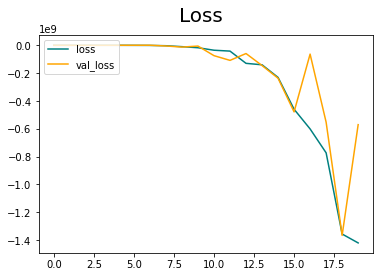

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

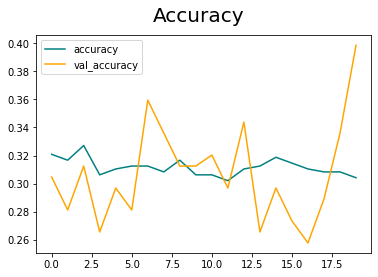

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.609375, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.234375, shape=(), dtype=float32)


# 10. Test

In [34]:
import cv2

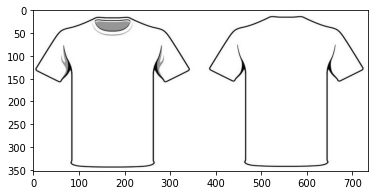

In [36]:
img = cv2.imread('image_2.jpg')
plt.imshow(img)
plt.show()

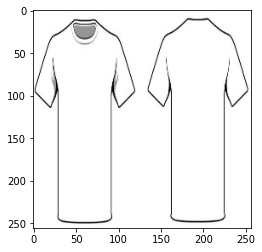

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [39]:
yhat

array([[1.]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Baju')
else:
    print(f'Predicted class is Celana')

Predicted class is Baju


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

In [49]:
new_model = load_model('models/imageclassifier.h5imageclassifier.h5')

OSError: No file or directory found at models/imageclassifier.h5imageclassifier.h5

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined